# Extracting Histogram XY Series

This notebook illustrates steps to extract series of data to list format.   Experiment dataset is using "Student Performance in exam", which can found at [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams).

In [179]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [150]:
df_raw = pd.read_csv("./dataset/StudentsPerformance.csv")
df_raw.shape

(1000, 8)

In [151]:
df_raw.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [152]:
df_raw.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

## 1. Global Variable Setup

In [154]:
BIN_SIZE = 10

SR_MATHSCORE = df_raw['math score']
MEAN = df_raw['math score'].describe()['mean']
STD = df_raw['math score'].describe()['std']

## 2. Basic Dataframe Histogram for 'math score' Column 

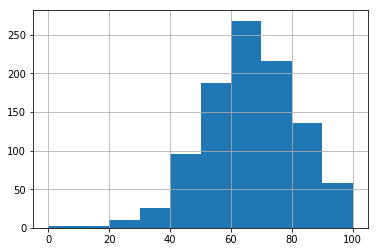

In [155]:
hist = df_raw['math score'].hist(bins=BIN_SIZE)

## 3. Histogram with Bell Curve

In [156]:
sr = df_raw['math score']

In [157]:
# Fit a normal distribution to the data:
mu = sr.describe()['mean']
std = sr.describe()['std']

print("mu = {}, std = {}".format(mu, std))

mu = 66.089, std = 15.163080096009468


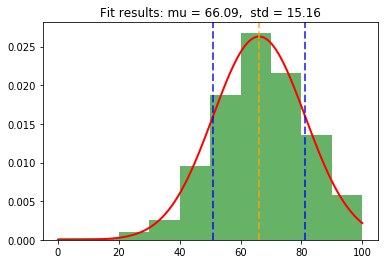

In [158]:
# Plot the histogram.
plt.hist(sr.values, bins=BIN_SIZE, histtype='stepfilled', density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(0, 100, 1000)
p = norm.pdf(x, mu, std) 
plt.plot(x, p, 'r', linewidth=2) 
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.axvline(x=mu, color='orange', linestyle='dashed', lw=2, alpha=0.7)
plt.axvline(x=mu-std, color='blue', linestyle='dashed', lw=2, alpha=0.7)
plt.axvline(x=mu+std, color='blue', linestyle='dashed', lw=2, alpha=0.7)

plt.show()

### 3.1  Experimenting the bell curve probability values

In [159]:
x

array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
         0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
         0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
         1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
         1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
         2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
         2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
         2.8028028 ,   2.9029029 ,   3.003003  ,   3.1031031 ,
         3.2032032 ,   3.3033033 ,   3.4034034 ,   3.5035035 ,
         3.6036036 ,   3.7037037 ,   3.8038038 ,   3.9039039 ,
         4.004004  ,   4.1041041 ,   4.2042042 ,   4.3043043 ,
         4.4044044 ,   4.5045045 ,   4.6046046 ,   4.7047047 ,
         4.8048048 ,   4.9049049 ,   5.00500501,   5.10510511,
         5.20520521,   5.30530531,   5.40540541,   5.50550551,
         5.60560561,   5.70570571,   5.80580581,   5.90590591,
         6.00600601,   6.10610611,   6.20620621,   6.30

In [160]:
p

array([1.97238157e-06, 2.02991351e-06, 2.08903254e-06, 2.14977965e-06,
       2.21219683e-06, 2.27632703e-06, 2.34221425e-06, 2.40990352e-06,
       2.47944093e-06, 2.55087366e-06, 2.62425000e-06, 2.69961936e-06,
       2.77703234e-06, 2.85654067e-06, 2.93819734e-06, 3.02205652e-06,
       3.10817368e-06, 3.19660553e-06, 3.28741012e-06, 3.38064682e-06,
       3.47637637e-06, 3.57466090e-06, 3.67556396e-06, 3.77915053e-06,
       3.88548710e-06, 3.99464164e-06, 4.10668367e-06, 4.22168427e-06,
       4.33971614e-06, 4.46085358e-06, 4.58517259e-06, 4.71275085e-06,
       4.84366775e-06, 4.97800449e-06, 5.11584403e-06, 5.25727119e-06,
       5.40237265e-06, 5.55123700e-06, 5.70395477e-06, 5.86061848e-06,
       6.02132267e-06, 6.18616393e-06, 6.35524096e-06, 6.52865458e-06,
       6.70650780e-06, 6.88890587e-06, 7.07595626e-06, 7.26776878e-06,
       7.46445558e-06, 7.66613118e-06, 7.87291257e-06, 8.08491919e-06,
       8.30227303e-06, 8.52509864e-06, 8.75352320e-06, 8.98767656e-06,
      

In [161]:
max(p)

0.026310078266633074

In [162]:
0.025 * 10000

250.0

In [163]:
p_exp = p * 10000
p_exp

array([1.97238157e-02, 2.02991351e-02, 2.08903254e-02, 2.14977965e-02,
       2.21219683e-02, 2.27632703e-02, 2.34221425e-02, 2.40990352e-02,
       2.47944093e-02, 2.55087366e-02, 2.62425000e-02, 2.69961936e-02,
       2.77703234e-02, 2.85654067e-02, 2.93819734e-02, 3.02205652e-02,
       3.10817368e-02, 3.19660553e-02, 3.28741012e-02, 3.38064682e-02,
       3.47637637e-02, 3.57466090e-02, 3.67556396e-02, 3.77915053e-02,
       3.88548710e-02, 3.99464164e-02, 4.10668367e-02, 4.22168427e-02,
       4.33971614e-02, 4.46085358e-02, 4.58517259e-02, 4.71275085e-02,
       4.84366775e-02, 4.97800449e-02, 5.11584403e-02, 5.25727119e-02,
       5.40237265e-02, 5.55123700e-02, 5.70395477e-02, 5.86061848e-02,
       6.02132267e-02, 6.18616393e-02, 6.35524096e-02, 6.52865458e-02,
       6.70650780e-02, 6.88890587e-02, 7.07595626e-02, 7.26776878e-02,
       7.46445558e-02, 7.66613118e-02, 7.87291257e-02, 8.08491919e-02,
       8.30227303e-02, 8.52509864e-02, 8.75352320e-02, 8.98767656e-02,
      

In [164]:
min(p_exp) * 10000

197.23815679635305

#### Plotting bell curve 

By multiplying 10000 to the bell curve y-series data, the y-values are closed to histogram y-series values.  However, the histogram bars are missing.  Still not resolve this yet. 

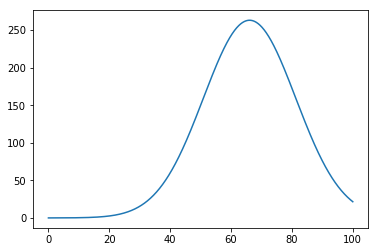

In [165]:
plt.plot(x, p_exp)

## 4. Zip XY value to for Highchart's data series format

### 4.1 Generate XY series for Histogram Bar 

In [178]:
# Histogram Data
hist_result = pd.cut(df_raw['math score'], BIN_SIZE).value_counts()

# Get x_series of data 
list_x = []
for item in hist_result.index.values:
    list_x.append(item.left)

# Create list of y_series data
list_y = hist_result.values.tolist()

series_bar_xy = [list(a) for a in zip(list_x, list_y)]
series_bar_xy

[[60.0, 270],
 [70.0, 215],
 [50.0, 189],
 [80.0, 126],
 [40.0, 100],
 [90.0, 50],
 [30.0, 34],
 [20.0, 12],
 [10.0, 2],
 [-0.1, 2]]

### 4.2  Generate XY series for Bell Curve

In [173]:
bcx = np.linspace(0, 100, 10)
bcp = (norm.pdf(bcx, MEAN, STD)) * 10000

In [174]:
bellcurve_xy = [list(a) for a in zip(bcx.tolist(), bcp.tolist())]
bellcurve_xy

[[0.0, 0.019723815679635305],
 [11.11111111111111, 0.3676671587030352],
 [22.22222222222222, 4.006092292248792],
 [33.33333333333333, 25.51462969531547],
 [44.44444444444444, 94.98604318905743],
 [55.55555555555556, 206.6962187130155],
 [66.66666666666666, 262.9102236431399],
 [77.77777777777777, 195.47203095982397],
 [88.88888888888889, 84.95011749795269],
 [100.0, 21.57970732846293]]

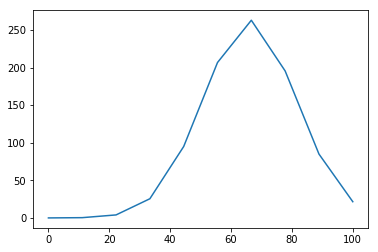

In [175]:
plt.plot(bcx, bcp)

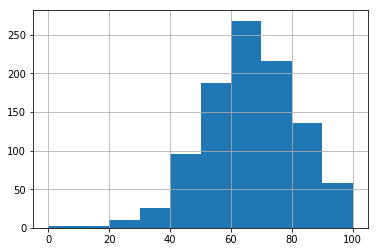

In [176]:
hist = df_raw['math score'].hist(bins=BIN_SIZE)